# Utilización de grid search

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree

Cargamos los datos

In [2]:
# Cargar datos
data = fetch_california_housing()
X = data.data
y = data.target

# División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Definimos un modelo y el correspondiente "grid"

In [6]:
35*18*8

5040

In [7]:
# Definir modelo
dt = DecisionTreeRegressor(random_state=42)

# Definir hiperparámetros
param_grid_dt = {
    'max_depth': [i for i in range(5,40)],
    'min_samples_split': [i for i in range(2,20)],
    'min_samples_leaf': [i for i in range(2,10)]
}

# Configurar GridSearch
grid_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

Entrenamos y obtenemos el mejor conjunto de parámetros de la familia dada

In [8]:
# Entrenar
grid_dt.fit(X_train, y_train)

# Mejor modelo
best_dt = grid_dt.best_estimator_

# Evaluar
y_pred_dt = best_dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)

print("Mejores parámetros Árbol:", grid_dt.best_params_)
print("MSE Árbol:", mse_dt)

KeyboardInterrupt: 

[Text(0.5875731955066922, 0.9545454545454546, 'MedInc <= 5.086\nsquared_error = 1.337\nsamples = 16512\nvalue = 2.072'),
 Text(0.3210668618546845, 0.8636363636363636, 'MedInc <= 3.074\nsquared_error = 0.834\nsamples = 13101\nvalue = 1.74'),
 Text(0.4543200286806883, 0.9090909090909092, 'True  '),
 Text(0.15633962715105162, 0.7727272727272727, 'AveRooms <= 4.314\nsquared_error = 0.561\nsamples = 6268\nvalue = 1.358'),
 Text(0.0827557361376673, 0.6818181818181818, 'MedInc <= 2.215\nsquared_error = 0.679\nsamples = 2624\nvalue = 1.626'),
 Text(0.03919694072657744, 0.5909090909090909, 'AveRooms <= 3.422\nsquared_error = 0.575\nsamples = 1404\nvalue = 1.377'),
 Text(0.018164435946462717, 0.5, 'AveBedrms <= 1.027\nsquared_error = 0.832\nsamples = 482\nvalue = 1.775'),
 Text(0.008365200764818356, 0.4090909090909091, 'Longitude <= -121.825\nsquared_error = 0.459\nsamples = 167\nvalue = 1.436'),
 Text(0.0028680688336520078, 0.3181818181818182, 'AveBedrms <= 0.892\nsquared_error = 1.416\nsamples

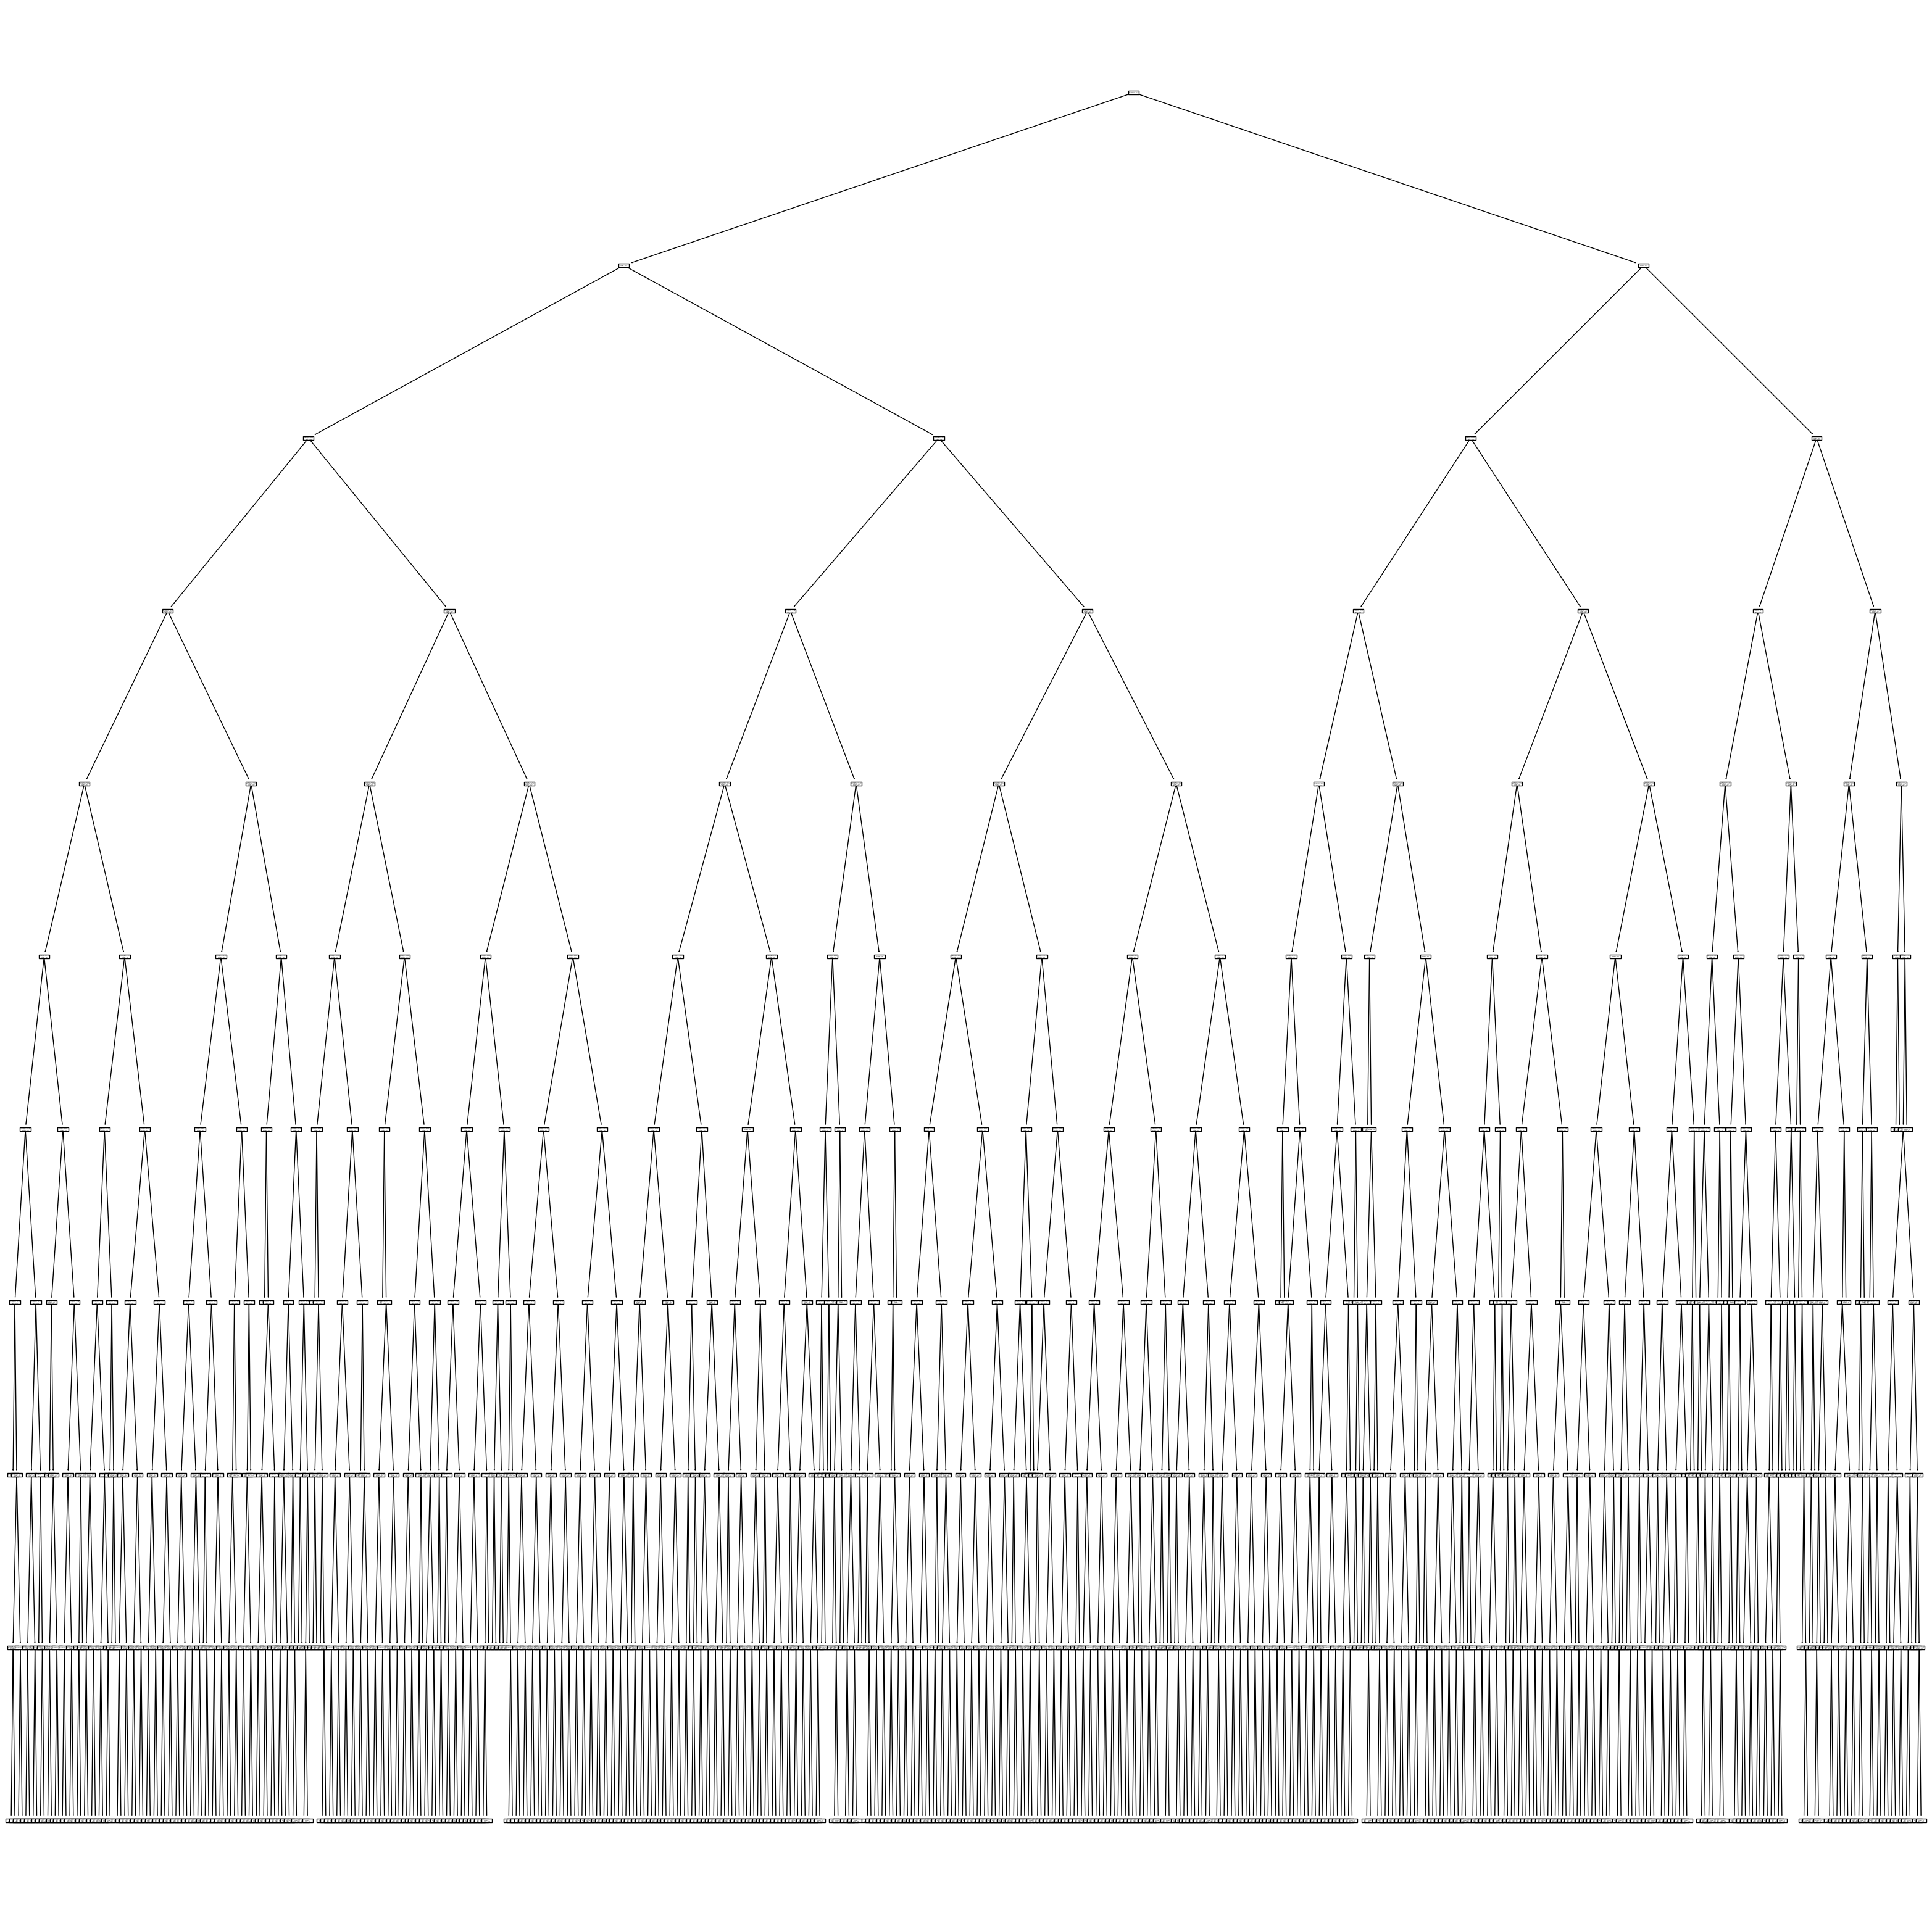

In [ ]:
plt.figure(figsize=(40,40))

Ahora, vamos a modelar con una regresión de Lasso

In [13]:
# Pipeline con escalado + Lasso
pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])

# Hiperparámetros
param_grid_lasso = {
    'lasso__alpha': np.logspace(-4, 1, 1000)
}

# GridSearch
grid_lasso = GridSearchCV(
    estimator=pipeline_lasso,
    param_grid=param_grid_lasso,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)


Entrenamos el "grid"

In [14]:
# Entrenar
grid_lasso.fit(X_train, y_train)

# Mejor modelo
best_lasso = grid_lasso.best_estimator_

# Evaluar
y_pred_lasso = best_lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print("Mejor alpha Lasso:", grid_lasso.best_params_)
print("MSE Lasso:", mse_lasso)

Mejor alpha Lasso: {'lasso__alpha': 0.0005698437059469137}
MSE Lasso: 0.5550762063270893
